<center><b>Ecole Polytechnique, Cycle Ingénieur (2A)<b></center>
<center>APM_41M01_EP - Problem solving en mathématiques appliquées</center>
<center>Enseignants : Ludovic Goudenège <a href="mailto:ludovic.goudenege@polytechnique.edu">(mail)</a>
    Teddy Pichard	<a href="mailto:teddy.pichard@polytechnique.edu">(mail)</a>
        </center>


# Algorithmes randomisés

In [1]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
# css_styling()

In [2]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing
import random
%matplotlib inline

## Table des matières

- [Quicksort](#Prelim)
 - [Random Quicksort (uniforme)](#Uniform)
 - [Median-of-Three Quicksort](#Median)
- [QuickMedian](#QuickSelect)



# Introduction

L'objectif de ce TP est d'illustrer la puissance des algorithmes probabilistes (ou <i>randomisés</i>) pour résoudre des problèmes déterministes. Il existe deux grandes classes d'algorithmes randomisés :

* Les algorithmes de Las Vegas ont un temps d'exécution aléatoire mais donnent une réponse exacte ;
* Les algorithmes de Monte-Carlo ont un temps d'éxecution qui est déterministe (ou aléatoire mais borné) et donne une réponse approchée.

Nous allons nous concentrer ici sur des algorithmes de Las Vegas pour le tri de nombres.

<a id="Prelim"></a>
# Quicksort


`Quicksort` est l'un des algorithmes les plus populaires pour trier une liste de nombres $L=x_1,\dots,x_n$. L'objectif de cette section est d'analyser le comportement de `Quicksort` (et de ses variantes) lorsque les $x_i$ sont aléatoires et i.i.d.

Définissons formellement la sortie $\mathrm{Quicksort}(L)$ de l'algorithme : c'est la liste $L$  triée par ordre croissant.
L'idée de QuickSort est d'utiliser la stratégie <i>Diviser-pour-régner</i> et se décompose récursivement de la façon suivante :

1. Si $L$ est vide ou réduite à un seul élément, $\mathrm{Quicksort}(L)=L$.
2. Sinon le 1er élément $x_1$ est appelé <i>pivot</i> de la liste. On compare chacun des $n-1$ autres éléments à $x_1$ pour obtenir deux sous-listes
\begin{align*}
L_< = \{x_j; j\geq 2, x_j<x_1\},\\
L_{\geq} = \{x_j; j\geq 2, x_j\geq x_1\}.
\end{align*}
3. On applique récursivement l'algorithme à $L_<$ et $L_\geq$ : on renvoie la concaténation des trois listes
$$
\mathrm{Quicksort}(L_<),\qquad [x_1],\qquad \mathrm{Quicksort}(L_\geq).
$$

Voici schématiquement l'exécution de Quicksort  pour $L=[4,3,5,1,6,2]$:
<img src="figures/Quicksort.jpg" style="width:800px;"/>

On note $C(x_1,x_2,\dots,x_n)$ le nombre de comparaisons nécessaires pour trier la liste $x_1,\dots,x_n$. L'exemple ci-dessus démontre que
$$
C(4,3,5,1,6,2)=5+1+2+1=9.
$$


<div markdown=1 class=Rmk>
La complexité <i>dans le pire cas</i> de Quicksort est quadratique : il existe $c,C>0$ telles que
$$
cn^2 \leq \max_{x_1,\dots, x_n} C(x_1,x_2,\dots,x_n) \leq C n^2.
$$
<i>(Ici le seul coût considéré dans la complexité est le nombre de comparaisons de deux réels. On néglige donc les coûts d'accès et écriture en mémoire.)</i><br><br>
<b>Preuve :</b> Lorsque les $x_1,x_2,\dots,x_n$ sont déjà triés l'algorithme effectue
$$
(n-1)+(n-2)+\dots + 1 \sim \tfrac{1}{2}n^2 \text{ comparaisons,}
$$
d'où l'inégalité de gauche.

Pour l'inégalité de droite, montrons par récurrence que
$$
\max_{x_1,\dots, x_n} C(x_1,x_2,\dots,x_n) \leq 2 n^2.
$$
Pour $n=1$ c'est ok. Ensuite
\begin{align*}
C(x_1,x_2,\dots,x_n) &= (n-1) + C(\{x_j \text{ tels que }x_j<x_1\} ) + C(\{x_j \text{ tels que }x_j\geq x_1\} )\\
&\leq (n-1) + \max_{0\leq r\leq n-1} \bigg\{ \max_{y_1,\dots,y_r}C(y_1,\dots,y_r) + \max_{y_{r+1},\dots,y_{n-1}}C(y_{r+1},\dots,y_{n-1})\bigg\}\\
&\leq (n-1)+ \max_{0\leq r\leq n-1} 2r^2 + 2(n-1-r)^2\\
&\leq (n-1) +2(n-1)^2/2 \leq 2n^2.
\end{align*}

<a id="Uniform"></a>
L'objectif est d'évaluer la variable aléatoire $C_n:=C(X_1,\dots,X_n)$
lorsque les données sont des variables aléatoires $X_1,\dots,X_n$ i.i.d. uniformes sur $[0,1]$.  C'est donc l'analyse en complexité moyenne de `Quicksort`.

On peut démontrer les choses suivantes :
1. On a l'identité en loi :
$$
\mathrm{card} (L_<) \stackrel{\text{(loi)}}{=} \mathrm{card} (L_\geq) \stackrel{\text{(loi)}}{=} \text{Uniforme dans }\{0,1,\dots,n-1\}.
$$
2. Conditionnellement à $X_1$, les $X_j$ dans $L_<$ sont répartis uniformément dans l'intervalle $[0,X_1]$ et sont indépendants. (On a bien sûr le même énoncé pour $L_\geq$.)

On en déduit donc que le nombre aléatoire de comparaisons $C_n$ pour une liste de taille $n$ vérifie
\begin{align*}
C_0&=0,\\
C_1&=0,\\
\text{Pour tout }n\geq 2,\quad C_n &\stackrel{\text{(loi)}}{=} n-1 + C'_{U_n-1} + C''_{n-U_n}, \tag{$\$$}
\end{align*}
où $U_n$ est une uniforme sur $\{1,\dots,n\}$ et pour tout $k$, $C_k,C'_k, C''_k$ ont même loi, sont indépendantes entre elles et indépendantes de $U_n$.


<div markdown=1 class="DoIt">

1. Ecrire une fonction `Uniform(a,b)` qui renvoie un tirage d'une v.a. uniforme dans $\{a,a+1,\dots,b\}$.<br>
<i>(Rappel : `np.random.rand()` renvoie un réel uniforme dans $[0,1]$.</i>
2. Utiliser la relation $(\$)$ pour simuler des variables aléatoires $C_n$.<br>
Pour visualiser on vous suggère de tracer une grande quantité de points $(n,C_n)$ sur le même graphique, ainsi que $n\mapsto 2n\log(n)-2.85n$. (Prendre $n$ entre $1$ et $2000$.) <br><br>
<i>(<b>Attention!</b> Il n'y a pas besoin de réellement implémenter Quicksort, simplement de simuler $C_n$.)</i>

3. On peut démontrer (*) que
$$
\mathbb{E}[C_n] = 2n\log(n)-2.85n +o(n).
$$
Comparer avec vos résultats.<br>


(*) Référence: Voir par exemple p.37 dans M.Mitzenmacher, E.Upfal (2005). Probability and Computing. <i>Cambridge University Press</i>.

In [3]:
def Uniform(a,b):
    # returns the draw of a fair dice in {a,a+1,...,b}
    return np.random.randint(a, b+1)



In [4]:
def RandomQuicksort(n):
    # returns a random execution of C_n
    if n == 0 or n == 1:
        return 0

    U = Uniform(1, n)
    return n-1 + RandomQuicksort(U-1) + RandomQuicksort(n-U)


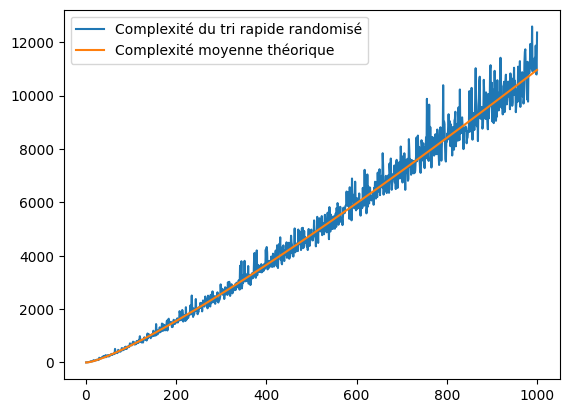

In [5]:
N = 1000
ns = np.arange(1, N+1)
f = lambda n: n*(2*np.log(n) - 2.85)

Cs = np.array([RandomQuicksort(n) for n in ns])
plt.plot(ns, Cs, label="Complexité du tri rapide randomisé")
plt.plot(ns, f(ns), label="Complexité moyenne théorique")
plt.legend()

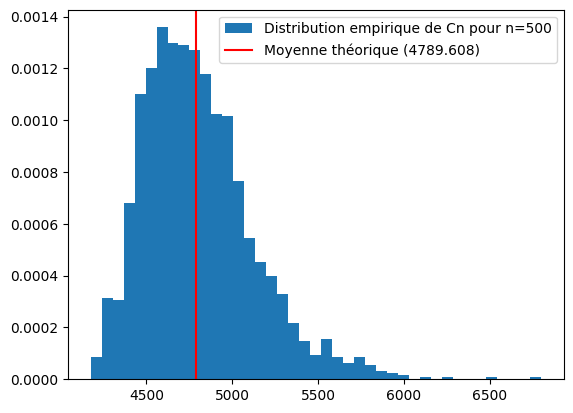

In [6]:
# E(Cn) théorique vs moyenne empirique
n = 500
N = 2000 # Nbre d'échantillonnage
ns = np.arange(1, N+1)
sample = np.array([RandomQuicksort(n) for _ in ns])
esp = f(n)

plt.hist(sample, density=True, bins='auto', label=f"Distribution empirique de Cn pour n={n}")
plt.axvline(esp, c='red', label=f"Moyenne théorique ({esp:.3f})")
plt.legend()

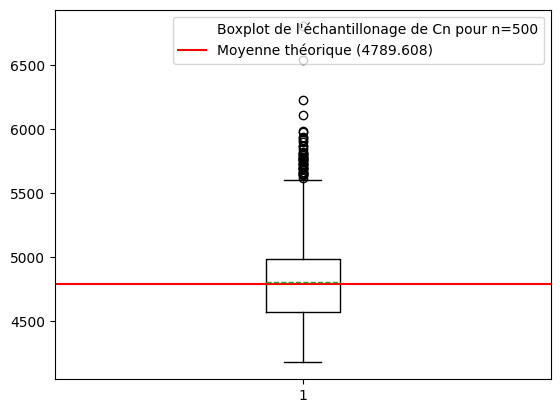

In [7]:
# Boxplot avec la moyenne
plt.boxplot(sample, showmeans=True, meanline=True, medianprops={'visible': False}, label=f"Boxplot de l'échantillonage de Cn pour n={n}")
plt.axhline(esp, c='red', label=f"Moyenne théorique ({esp:.3f})")
plt.legend()

<div markdown=1 class=Rmk>
La conséquence des cette analyse est que le comportement moyen en $2n\log(n)$ est bien inférieur au comportement dans le pire cas en $n^2$. C'est pourquoi dans certaines libraires l'algorithme Quicksort est implémenté avec une étape préliminaire consistant à mélanger uniformément la liste $x_1,\dots,x_n$.<br>
Concrètement, il suffit simplement de choisir le pivot uniformément dans la liste à chaque itération de l'algorithme.

<a id="Median"></a>
### Une amélioration : Median-of-Three Quicksort

Intuitivement, Quicksort est plus efficace lorsque $L_<$ et $L_{\geq}$ sont de taille équivalente. Pour exploiter cette idée, une variante assez utilisée dans la pratique consiste à prendre la médiane de $X_1,X_2,X_3$ comme pivot au lieu de $X_1$. C'est <i>Median-of-Three Quicksort</i>.<br>
L'objectif est d'illustrer l'efficacité de cette variante.

<div markdown=1 class="DoIt">
1. Les variables aléatoires $X_1,X_2,X_3$ sont indépendantes et uniformes sur $[0,1]$. Quelle est la loi du nombre de comparaisons nécessaires pour trouver la médiane de $X_1,X_2,X_3$? On note $\mathcal{M}$ une réalisation de cette variable, écrire une fonction qui simule $\mathcal{M}$.

2. Déterminer l'analogue de $(\$)$ pour Median-of-Three Quicksort. En déduire des simulations des variables aléatoires $D_n$ définies par le nombre de comparaisons pour Median-of-Three Quicksort.<br>
<i>(Attention : ne pas oublier le coût de calcul de la médiane.)</i>

En s'inspirant de ce qui a été fait en amont,

On en déduit que le nombre aléatoire de comparaisons $D_n$ vérifie
\begin{align*}
D_0&=0,\\
D_1&=0,\\
D_2&=1,\\
\text{Pour tout }n\geq 3,\quad
D_n &\stackrel{\text{(loi)}}{=} M \;+\; (n-3) \;+\; D'_{I-1} \;+\; D''_{n-I},
\end{align*}
où $I$ est le rang du pivot issu de la médiane de trois positions, $M$ est le coût (en comparaisons) du calcul de cette médiane, et pour tout $k$, $D_k,D'_k,D''_k$ ont même loi, sont indépendantes entre elles et indépendantes de $(I,M)$.

Cette relation permet de simuler $D_n$ directement (tirer $I$ par “median-of-three” sur $\{1,\dots,n\}$ et $M$, puis appliquer la récurrence).

3. Comparer vos simulations avec Quicksort classique et avec le résultat en moyenne :<br>
Pour Median-of-Three Quicksort on a
$$
\mathbb{E}[D_n] = \tfrac{12}{7}n\log(n)-1.827n +o(n).
$$
(voir Th.3.5 dans Sedgewick, R., & Flajolet, P. (2013). An introduction to the analysis of algorithms.)

<div markdown=1 class="Answers">
1.

2.

In [8]:
def CostOfMedian():
    # Renvoie une réalisation de M
    return 2 + (np.random.rand() < 2/3)

In [9]:
def MedianOfThree(a, b):
    # renvoie une variable aléatoire de loi "médiane de 3 uniformes distinctes entre a et b"
    uniforms = np.random.choice(np.arange(a, b+1), size=3)
    # print(uniforms)
    return np.sort(uniforms)[1]


In [10]:
def MedianQuicksort(n):
    # renvoie une simulation de D_n
    if n == 0 or n == 1:
        return 0
    if n == 2:
        return 1

    I = MedianOfThree(1, n)
    M = CostOfMedian()
    return M + n-3 + MedianQuicksort(I-1) + MedianQuicksort(n-I)

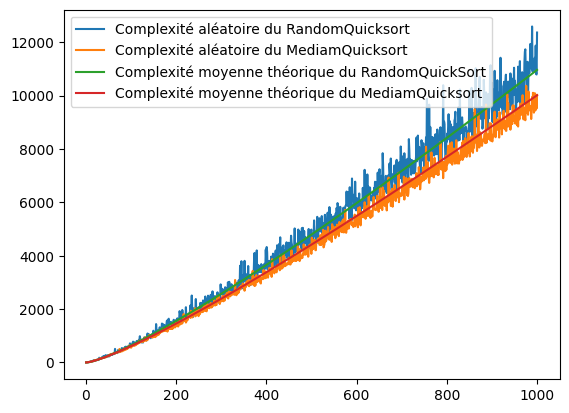

In [11]:
N = 1000
ns = np.arange(1, N+1)
g = lambda n: n*(12/7*np.log(n) - 1.827)

Ds = np.array([MedianQuicksort(n) for n in ns])
plt.plot(ns, Cs, label="Complexité aléatoire du RandomQuicksort")
plt.plot(ns, Ds, label="Complexité aléatoire du MediamQuicksort")
plt.plot(ns, f(ns), label="Complexité moyenne théorique du RandomQuickSort")
plt.plot(ns, g(ns), label="Complexité moyenne théorique du MediamQuicksort")
plt.legend()

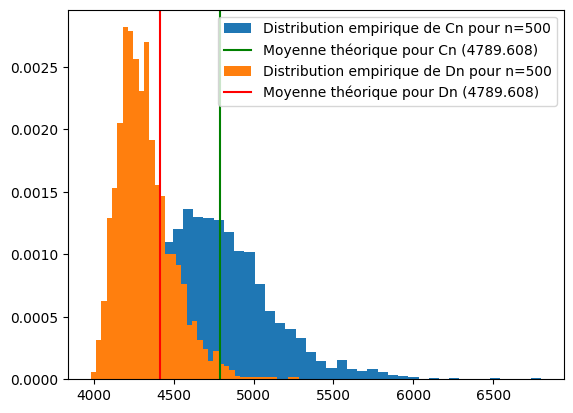

In [12]:
# E(Dn) théorique vs moyenne empirique vs Cn
n = 500
N = 2000 # Nbre d'échantillonnage
ns = np.arange(1, N+1)
sampleM = np.array([MedianQuicksort(n) for _ in ns])
espM = g(n)

plt.hist(sample, density=True, bins='auto', label=f"Distribution empirique de Cn pour n={n}")
plt.axvline(esp, c='green', label=f"Moyenne théorique pour Cn ({esp:.3f})")
plt.hist(sampleM, density=True, bins='auto', label=f"Distribution empirique de Dn pour n={n}")
plt.axvline(espM, c='red', label=f"Moyenne théorique pour Dn ({esp:.3f})")
plt.legend()

On obtient des gains en matière de complexité avec l'approche MedianQuickSort

<a id="QuickSelect"></a>
#  QuickMedian : Algorithme randomisé pour la médiane

Un algorithme naïf pour trouver la médiane d'une liste $\{X_1,\dots, X_n\}$ consiste à trier la liste et à lire ensuite le $\lfloor n/2\rfloor$-ème élément. D'après ce qui précède cela coûte $\text{constante}\times n\log(n)$ comparaisons.

Nous allons utiliser la stratégie randomisée pour trouver la médiane avec un nombre linéaire de comparaisons.

## QuickMedian


<div markdown=1 class="DoIt">

1. En s'inspirant de la stratégie QuickSort, décrire un algorithme efficace QuickMedian qui renvoie le $k$-ème plus petit élément d'une liste $\{X_1,\dots, X_n\}$ (sans trier toute la liste!).

L’idée est la suivante :

1. **Choix du pivot** : sélectionner un élément de la liste de manière aléatoire (par exemple uniforme parmi les $n$ éléments).
2. **Partition** : comparer les $n-1$ autres éléments au pivot pour former deux sous-listes :
   $$
   L_< = \{x \in L \setminus \{\text{pivot}\} \;|\; x < \text{pivot}\}, \quad
   L_> = \{x \in L \setminus \{\text{pivot}\} \;|\; x > \text{pivot}\}.
   $$
3. **Décision** :
   - Si $\mathrm{card}(L_<) = k-1$, le pivot est le $k$-ème plus petit élément.
   - Si $\mathrm{card}(L_<) > k-1$, rechercher le $k$-ème plus petit élément dans $L_<$.
   - Si $\mathrm{card}(L_<) < k-1$, rechercher le $(k - \mathrm{card}(L_<) - 1)$-ème plus petit élément dans $L_>$.

Cet algorithme ne trie qu’une partie de la liste à chaque étape et ne poursuit la récursion que dans **un seul** des deux sous-tableaux, ce qui permet d’obtenir en moyenne une complexité en $\mathcal{O}(n)$ pour trouver la médiane (cas $k = \lfloor n/2 \rfloor$).

2. Ecrire la relation de récurrence pour le nombre de comparaisons $S_{n,k}$ effectuées par QuickMedian.


<div markdown=1 class="Answers">
En s’inspirant de ce qui a été fait pour `Quicksort` plus haut,

On en déduit que le nombre aléatoire de comparaisons $S_{n,k}$ pour `QuickMedian` vérifie
\begin{align*}
S_{n,k} &= 0, && \text{si } n \le 1,\\
\text{Pour tout } n \ge 2,\quad
S_{n,k} &\stackrel{\text{(loi)}}{=} (n-1) \;+\;
\begin{cases}
S'_{U-1,k} & \text{si } U > k,\\
S''_{n-U,k-U} & \text{si } U < k,\\
0, & \text{si } U = k,
\end{cases}
\end{align*}
où $U$ est une variable uniforme sur $\{1,\dots,n\}$ représentant le rang du pivot choisi, et pour tout $k$, $S_{n,k},S'_{n,k},S''_{n,k}$ ont même loi, sont indépendantes entre elles et indépendantes de $U$.

Cette relation permet de simuler $S_{n,k}$ directement (tirer $U$ uniformément dans $\{1,\dots,n\}$, puis appliquer la récurrence en fonction de la position de $U$ par rapport à $k$).


<div markdown=1 class="DoIt">
1. Ecrire une fonction qui simule la variable $S_{n,k}$.

2. Afficher plusieurs simulations pour $k=\lfloor n/2\rfloor$ (calcul de la médiane). On devrait avoir
$$
\mathbb{E}[S_{n,\lfloor n/2\rfloor}] = n\left(2+2\log(2)\right) + \mathrm{o}(n) = n\times 3.3863... + \mathrm{o}(n)
$$
(<a href="https://11011110.github.io/blog/2007/10/09/blum-style-analysis-of.html">Voir ce lien.</a>)

In [13]:
def RandomQuickMedian(n, k):
    # returns a random execution of S_n,k
    if n == 0 or n == 1:
        return 0

    U = Uniform(1, n)
    comp = n-1
    if U == k:
        return comp
    if U > k:
        return comp + RandomQuickMedian(U-1, k)

    return comp + RandomQuickMedian(n-U, k-U)


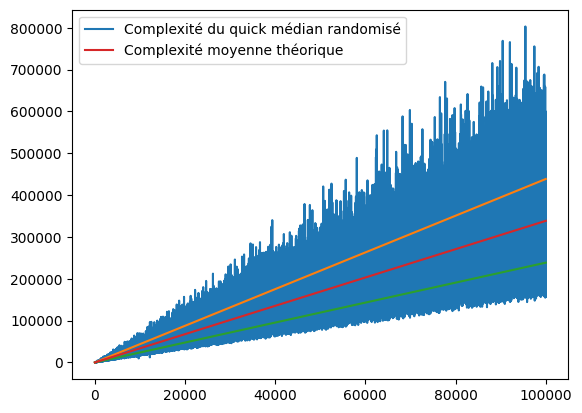

In [17]:
N = 100000
ns = np.arange(1, N+1)
k = lambda n: n//2
h = lambda n: n * 2 * (1 + np.log(2))
hs = h(ns)

Cs = np.array([RandomQuickMedian(n, k(n)) for n in ns])
Cs_up = hs + ns
Cs_down = hs - ns
plt.plot(ns, Cs, label="Complexité du quick médian randomisé")
plt.plot(ns, Cs_up)
plt.plot(ns, Cs_down)
plt.plot(ns, h(ns), label="Complexité moyenne théorique")
plt.legend()


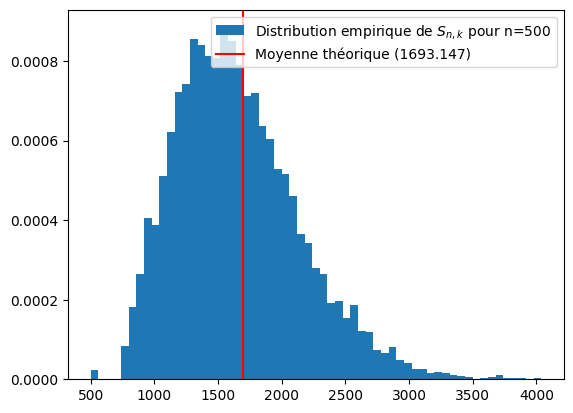

In [15]:
# E(S_n,k) théorique vs moyenne empirique
n = 500
N = 10000 # Nbre d'échantillonnage
ns = np.arange(1, N+1)
sample = np.array([RandomQuickMedian(n, k(n)) for _ in ns])
esp = h(n)

plt.hist(sample, density=True, bins='auto', label=r"Distribution empirique de $S_{n,k}$" + f" pour n={n}")
plt.axvline(esp, c='red', label=f"Moyenne théorique ({esp:.3f})")
plt.legend()

**Commentaire**

La figure montre que la complexité empirique du `QuickMedian` croît globalement de façon linéaire avec $n$, conformément à la tendance théorique, mais présente une forte variance qui pourrait être due au caractère aléatoire du choix des pivots, entraînant des fluctuations importantes autour de la droite moyenne.
